### Image Classification with ANN

#### 1. Business Problem:

- In this project, CIFAR-10 dataset is used.
- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
- Airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck are the class names.

#### 2. Data Understanding:

In [1]:
# Import İşlemleri 
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.datasets import cifar10 # veri setini yükleme
from tensorflow.keras.utils import to_categorical #kategorik verilere çevirme
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Flatten # ANN'de Dense katmanı kullanılır yani bağlı katmanlar

import matplotlib.pyplot as plt

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
print("Eğitim Seti Boyutu:", x_train.shape, y_train.shape)

Eğitim Seti Boyutu: (50000, 32, 32, 3) (50000, 1)


In [4]:
print("Test Seti Boyutu:", x_test.shape, y_test.shape)

Test Seti Boyutu: (10000, 32, 32, 3) (10000, 1)


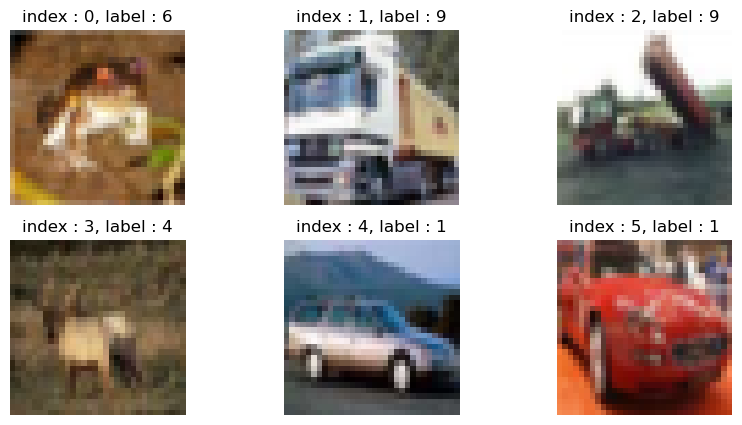

In [5]:
plt.figure(figsize=(10,5))
for n in range(6):
    plt.subplot(2, 3, n+1) 
    plt.imshow(x_train[n]) 
    plt.title(f"index : {n}, label : {y_train[n][0]}")
    plt.axis('off')

#### 3. Data Preparation:

In [6]:
#------------------------- Normalization -------------------------
# normalize etmek demek 0 ile 1 arasına sıkıştırmak yani scale etmek demektir bu nedenle 255'e böleriz
# input değerlerinin yani görsellerdeki piksel değerlerinin 0 ila 1 arasında değer almaları sağlanıyor.

x_train = x_train.astype('float32') / 255 

x_test = x_test.astype('float32') / 255

In [7]:
#------------------------- Encoding, One-Hot Encoding -------------------------------

# encode işlemini hem y_train hem de y_test setine uygulamalıyız. Bu işlem ile veriyi kategorik hale getiririz 
y_train = to_categorical(y_train, 10) # y_train içinde 10 tane unique değer vardır
y_test = to_categorical(y_test, 10)

#### 4. Modelling:

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(32,32,3))) # 3 boyutlu veriyi 1 boyutlu hale getirir

model.add(Dense(512, activation = "relu", name='layer1')) # hidden layers
model.add(Dense(256, activation = "relu", name='layer2'))

model.add(Dense(10, activation = "softmax", name='output_layer')) # 10 tane sınıf old için 10 tane nöron ekledik

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#------------ Compile --------------------------------
# modelin iç inşası diyebiliriz bu bölüme, matematiksel özellikler belirleniyor
# 'loss' hata değerlendirme metriğidir, çok sınıflı bir sınıflandırma problemi old. için "categorical_crossentropy" yöntemi kullanılır
# loss fonksiyonunu minimize edecek optimizasyon yöntemi "adam" algoritmasıdır.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', # büyük veri ve komplex ağlar için idealdir
              metrics=["accuracy"])

In [11]:
# monitor = doğrulama setindeki(val) kaybı(loss) izler
# patience: 5 epoch boyunca val loss değişmiyorsa erken durdurma yapalım
# model checkpoint = en iyi modelin ağırlıklarını kaydeder

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)
check_point = ModelCheckpoint(filepath='ann_best_model.keras', monitor='val_loss', save_best_only=True)

In [12]:
# model training
# batch_size: 60 demek elimizdeki veriyi 60'lı paketler halinde(batch'ler halinde) train işlemi gerçekleştirilecek
# validation_split = 0.2 : eğitim veri setinin %20'si validation veri seti olarak kullanılacak
history = model.fit(x_train, y_train, epochs = 10, batch_size = 60, validation_split = 0.2, callbacks = [early_stopping,check_point])

Epoch 1/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2748 - loss: 2.0504 - val_accuracy: 0.3695 - val_loss: 1.7604
Epoch 2/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3829 - loss: 1.7148 - val_accuracy: 0.3898 - val_loss: 1.7140
Epoch 3/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4132 - loss: 1.6362 - val_accuracy: 0.4280 - val_loss: 1.6115
Epoch 4/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4431 - loss: 1.5567 - val_accuracy: 0.4381 - val_loss: 1.5751
Epoch 5/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4636 - loss: 1.5016 - val_accuracy: 0.4284 - val_loss: 1.6044
Epoch 6/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4711 - loss: 1.4773 - val_accuracy: 0.4595 - val_loss: 1.5377
Epoch 7/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4878 - loss: 1.4339 - val_accuracy: 0.4574 - val_loss: 1.5216
Epoch 8/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4987 - loss: 1.4099 - val_acc

- Batch size'ı 60 olarak belirlediğimize göre 1 epoch'ta 667 tane 60'arlı paket modele verilir eğitim için.
- Ve epoch sayısını da 10 olarak belirlediğimiz için bu işlem 10 defa tekrar eder. 

#### 5. Evaluation:

In [13]:
# model performance evaluation with test dataset 
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4810 - loss: 1.4486


In [14]:
print(f"Test loss: {test_loss}, Test Accuracy:{test_acc}")

Test loss: 1.4463131427764893, Test Accuracy:0.4830999970436096


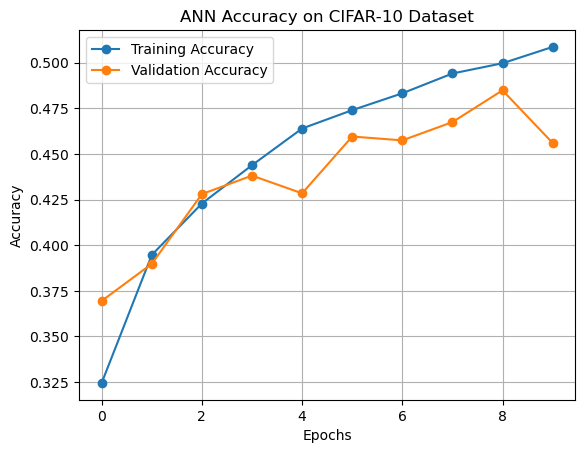

In [15]:
# training and validation accuracy visualization 

plt.figure()
plt.plot(history.history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.title("ANN Accuracy on CIFAR-10 Dataset")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

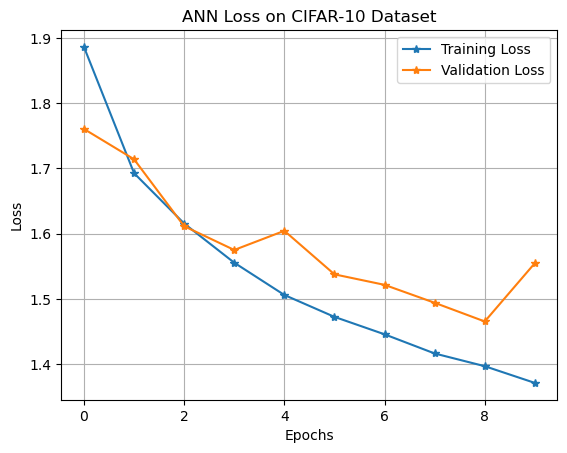

In [18]:
# training and validation loss visualization 

plt.figure()
plt.plot(history.history["loss"], marker = "*", label = "Training Loss")
plt.plot(history.history["val_loss"], marker = "*", label = "Validation Loss")
plt.title("ANN Loss on CIFAR-10 Dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

#### Saving Model 

In [19]:
# Kurduğumuz ANN modelini daha sonra da kullanabilmek için kaydedelim

model.save("cifar10_ann_model.keras")

In [20]:
# loading model
loaded_model = load_model("cifar10_ann_model.keras")

In [21]:
# dışarıdan gelen yeni bir veriyi bu modelle eğitmek ve test etmek için bu şekilde kullanırız.
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}, Test Accuracy:{test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4810 - loss: 1.4486
Test loss: 1.4463131427764893, Test Accuracy:0.4830999970436096
